In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [35]:
df=pd.read_csv('url_feature_extracted.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,url,label,result,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,https://www.google.com,benign,0,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1
1,https://www.youtube.com,benign,0,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1
2,https://www.facebook.com,benign,0,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1
3,https://www.baidu.com,benign,0,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1
4,https://www.wikipedia.org,benign,0,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1


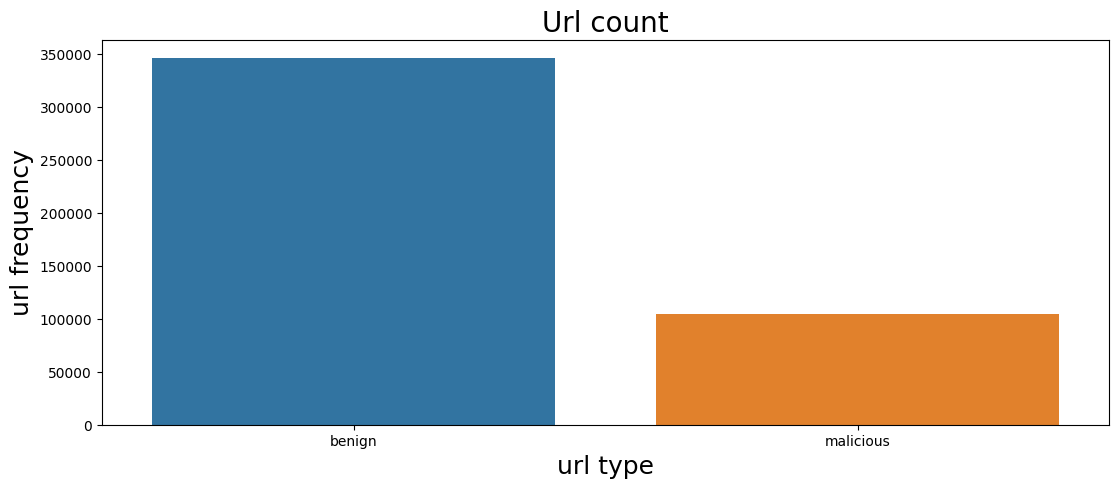

In [36]:
url_counts = df['url'].value_counts()
plt.figure(figsize=(13,5))
sns.countplot(x='label',data=df)
plt.title("Url count",fontsize=20)
plt.xlabel("url type",fontsize=18)
plt.ylabel("url frequency",fontsize=18)
plt.show()

In [37]:
df.drop(["url","label"],axis=1,inplace=True)

In [38]:
x = df.drop(['result'],axis=1)


y = df['result']
     

In [74]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y)

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)



In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)


In [86]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_classifier=xgb.XGBClassifier()

xgb_classifier.fit(x_train,y_train)

y_pred=xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9977439694568173


In [88]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model=RandomForestClassifier(n_estimators=100,random_state=42)

random_forest_model.fit(x_train,y_train)

y_pred=random_forest_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9978596633308267


In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [90]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [93]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [94]:
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)


Epoch 1/10



2161/2161 [==============================] - 10s 4ms/step - loss: 0.4826 - acc: 0.7601 - val_loss: 0.1725 - val_acc: 0.9586
Epoch 2/10
2149/2161 [============================>.] - ETA: 0s - loss: 0.0750 - acc: 0.9840
Reached 0.1 val_loss so cancelling training!
2161/2161 [==============================] - 8s 4ms/step - loss: 0.0748 - acc: 0.9840 - val_loss: 0.0397 - val_acc: 0.9932
